In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
tf.__version__

'2.18.0'

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# freezing the first 4 blocks
conv_base.trainable = False

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
import os
import zipfile

local_zip = '/tmp/image_scene.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/image_scene')
zip_ref.close()

In [ ]:
base_dir = '/tmp/image_scene'

#train directories
train_dir = os.path.join(base_dir, 'seg_train/seg_train')
test_dir = os.path.join(base_dir, 'seg_test/seg_test')

In [ ]:
import shutil

# create directories for partial train and test data (num_images/category)

categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
num_images = 350
partial_train_dir = '/tmp/partial_train'
partial_test_dir = '/tmp/partial_test'

os.makedirs(partial_train_dir, exist_ok=True)
os.makedirs(partial_test_dir, exist_ok=True)

In [ ]:
# copy num_images from each category to 'partial...' directives
def reduce_data(input_dir, output_dir):
  for category in categories:
    category_dir = os.path.join(input_dir, category)
    output_category_dir = os.path.join(output_dir, category)
    os.makedirs(output_category_dir, exist_ok=True)

    image_files = os.listdir(category_dir)[:num_images]
    for image_file in image_files:
      source_path = os.path.join(category_dir, image_file)
      dst_path = os.path.join(output_category_dir, image_file)
      shutil.copy(source_path, dst_path)

reduce_data(train_dir, partial_train_dir)
reduce_data(test_dir, partial_test_dir)

In [ ]:
# initilaizing arrays
train_images = []
train_labels = []

In [ ]:
import numpy as np

# combining all sub paths in 'partial...' directives into one for each set (training, test)
# so that later we can use flow_from_dataframe
def combining_paths(input_dir, features_array, labels_array):
  for category in categories:
    category_dir = os.path.join(input_dir, category)
    for fname in os.listdir(category_dir):
      features_array.append(os.path.join(category_dir, fname))
      labels_array.append(category)

combining_paths(partial_train_dir, train_images, train_labels)

In [ ]:
# convert all arrays to numpy arrays (dataframe) of images
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# augment train data to reduce overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# do not augment val and test data!
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    partial_test_dir,
    target_size=(150, 150),
    batch_size= 35,
    class_mode='categorical')

Found 2081 images belonging to 6 classes.


In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from sklearn.model_selection import KFold
import pandas as pd

k=4
num_epochs = 30
batch_size = 35
kf = KFold(n_splits=k, shuffle=True, random_state=42)

all_scores=[]

train_acc = []
val_acc =  []
train_loss = []
val_loss = []

In [ ]:
history = None #manually resets history
for fold, (train_idx, val_idx) in enumerate(kf.split(train_images)):
  print(f'\nProcessing fold # {fold+1}/{k}  ############################')

  # split data
  train_x, val_x = train_images[train_idx], train_images[val_idx]
  train_y, val_y = train_labels[train_idx], train_labels[val_idx]

  # preprocess data
  train_generator = train_datagen.flow_from_dataframe(
    dataframe = pd.DataFrame({'filename': train_x, 'class': train_y}),
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size= batch_size,
    class_mode='categorical',
    shuffle=True
  )

  # val generator
  val_generator = val_datagen.flow_from_dataframe(
      dataframe=pd.DataFrame({'filename': val_x, 'class': val_y}),
      x_col='filename',
      y_col='class',
      target_size=(150, 150),
      batch_size= batch_size,
      class_mode='categorical',
      shuffle=True)

  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(256, activation='relu', input_dim= 4 * 4 * 512))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(6, activation='softmax'))

  model.compile(optimizer=optimizers.Adam(learning_rate=2e-4),
                loss = 'categorical_crossentropy',
                metrics=['acc'])

  history = model.fit(train_generator,
                      steps_per_epoch = 100,
                      epochs=num_epochs,
                      validation_data = val_generator,
                      validation_steps=80)

  train_acc.append(history.history['acc'])
  val_acc.append(history.history['val_acc'])
  train_loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])



Processing fold # 1/4  ############################
Found 1575 validated image filenames belonging to 6 classes.
Found 525 validated image filenames belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 45/100 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - acc: 0.3627 - loss: 1.7001

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - acc: 0.4328 - loss: 1.4884 - val_acc: 0.7562 - val_loss: 0.5634
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - acc: 0.7128 - loss: 0.7419 - val_acc: 0.8210 - val_loss: 0.4394
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - acc: 0.7787 - loss: 0.5976 - val_acc: 0.8514 - val_loss: 0.3751
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - acc: 0.8195 - loss: 0.4889 - val_acc: 0.8610 - val_loss: 0.3686
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - acc: 0.8256 - loss: 0.4553 - val_acc: 0.8495 - val_loss: 0.4259
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - acc: 0.8398 - loss: 0.4526 - val_acc: 0.8533 - val_loss: 0.3850
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - acc: 0.8668 - loss: 0.3847 - val_acc: 0.8819 - val_loss: 0.3417
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - acc: 0.8650 - loss: 0.3892 - val_acc: 0.8229 - val_loss: 0.5082
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 45/100 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - acc: 0.6388 - loss: 1.0500

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - acc: 0.7292 - loss: 0.8083 - val_acc: 0.9657 - val_loss: 0.1015
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - acc: 0.9265 - loss: 0.2645 - val_acc: 0.9505 - val_loss: 0.1274
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - acc: 0.8985 - loss: 0.2923 - val_acc: 0.9695 - val_loss: 0.0911
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - acc: 0.9387 - loss: 0.1766 - val_acc: 0.9371 - val_loss: 0.1740
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - acc: 0.9360 - loss: 0.1774 - val_acc: 0.9752 - val_loss: 0.0905
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - acc: 0.9489 - loss: 0.1886 - val_acc: 0.9810 - val_loss: 0.0567
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - acc: 0.9549 - loss: 0.1495 - val_acc: 0.9676 - val_loss: 0.0948
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - acc: 0.9543 - loss: 0.1678 - val_acc: 0.9562 - val_loss: 0.1225
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 45/100 ━━━━━━━━━━━━━━━━━━━━ 12s 236ms/step - acc: 0.7135 - loss: 0.8254

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - acc: 0.7950 - loss: 0.6020 - val_acc: 0.9886 - val_loss: 0.0383
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - acc: 0.9475 - loss: 0.1589 - val_acc: 0.9733 - val_loss: 0.1204
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - acc: 0.9653 - loss: 0.1266 - val_acc: 0.9924 - val_loss: 0.0318
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - acc: 0.9656 - loss: 0.1114 - val_acc: 0.9848 - val_loss: 0.0439
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - acc: 0.9645 - loss: 0.1159 - val_acc: 0.9848 - val_loss: 0.0517
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - acc: 0.9773 - loss: 0.0894 - val_acc: 0.9867 - val_loss: 0.0765
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - acc: 0.9529 - loss: 0.1587 - val_acc: 0.9810 - val_loss: 0.0536
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - acc: 0.9718 - loss: 0.0839 - val_acc: 0.9905 - val_loss: 0.0182
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 45/100 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - acc: 0.7083 - loss: 0.8857

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - acc: 0.8031 - loss: 0.6097 - val_acc: 0.9962 - val_loss: 0.0094
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - acc: 0.9780 - loss: 0.0698 - val_acc: 0.9810 - val_loss: 0.0647
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - acc: 0.9819 - loss: 0.0703 - val_acc: 0.9962 - val_loss: 0.0221
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - acc: 0.9840 - loss: 0.0495 - val_acc: 0.9943 - val_loss: 0.0120
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - acc: 0.9794 - loss: 0.0890 - val_acc: 0.9733 - val_loss: 0.0839
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - acc: 0.9660 - loss: 0.1280 - val_acc: 0.9905 - val_loss: 0.0332
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - acc: 0.9721 - loss: 0.1159 - val_acc: 0.9867 - val_loss: 0.0403
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - acc: 0.9795 - loss: 0.0686 - val_acc: 0.9943 - val_loss: 0.0521
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s

In [ ]:
model.save('hw2#4.h5')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - acc: 0.8511 - loss: 1.9225


In [ ]:
# quick check
print(len(train_acc))
print(len(val_acc))
print(len(train_loss))
print(len(val_loss))

4
4
4
4


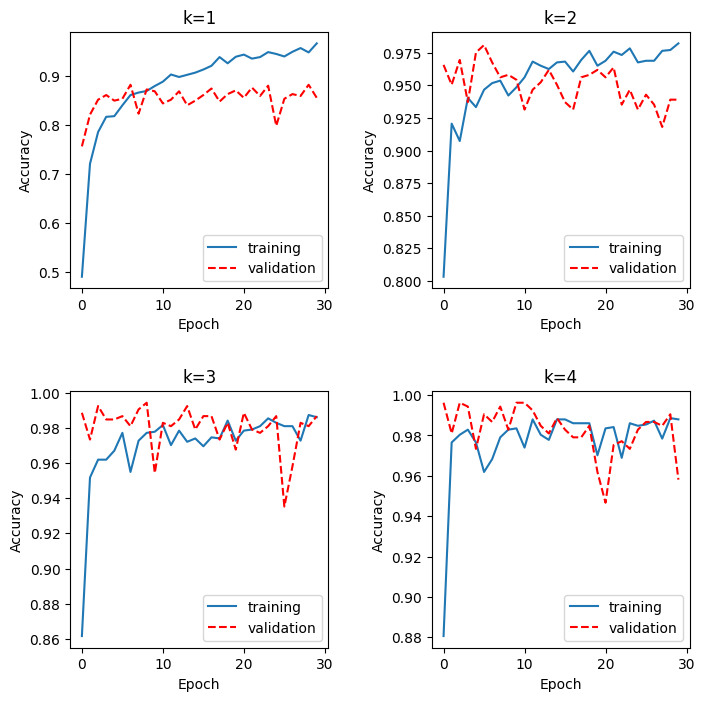

In [ ]:
import matplotlib.pyplot as plt

# Cross fold 0
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axs[0, 0].plot(np.arange(num_epochs), train_acc[0], label='training')
axs[0, 0].plot(np.arange(num_epochs), val_acc[0], 'r--', label='validation')
axs[0, 0].set_title("k=1")
axs[0, 0].set(xlabel='Epoch', ylabel='Accuracy')
axs[0, 0].legend()

# Cross fold 1
axs[0, 1].plot(np.arange(num_epochs), train_acc[1], label='training')
axs[0, 1].plot(np.arange(num_epochs), val_acc[1], 'r--', label='validation')
axs[0, 1].set_title("k=2")
axs[0, 1].set(xlabel='Epoch', ylabel='Accuracy')
axs[0, 1].legend()

# Cross fold 2
axs[1, 0].plot(np.arange(num_epochs), train_acc[2], label='training')
axs[1, 0].plot(np.arange(num_epochs), val_acc[2], 'r--', label='validation')
axs[1, 0].set_title("k=3")
axs[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
axs[1, 0].legend()

# Cross fold 3
axs[1, 1].plot(np.arange(num_epochs), train_acc[3], label='training')
axs[1, 1].plot(np.arange(num_epochs), val_acc[3], 'r--', label='validation')
axs[1, 1].set_title("k=4")
axs[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
axs[1, 1].legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


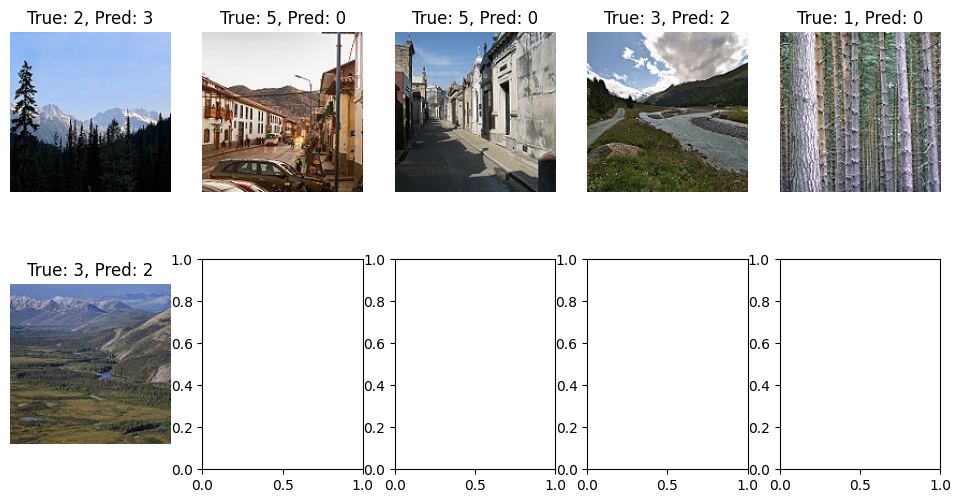

In [ ]:
# Get predictions on validation set
test_images, test_labels = next(test_generator)  # Get a batch
predictions = model.predict(test_images)
predicted = np.argmax(predictions, axis=1)
true_label = np.argmax(test_labels, axis=1)

# Identify where misclassified
misclassified_indices = np.where(predicted != true_label)[0]

# Display few misclassified images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:10]):
    axes[i // 5, i % 5].imshow(test_images[idx])
    axes[i // 5, i % 5].set_title(f'True: {true_label[idx]}, Pred: {predicted[idx]}')
    axes[i // 5, i % 5].axis('off')

plt.show()
